# STEP 1: Importing required Libraries

In [1]:
import tensorflow as tf
tf.enable_eager_execution()
import matplotlib.pyplot as plt

/home/yatharthmathur/.local/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# STEP 2: Importing the MNIST DataSet

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Let's see how the data looks like : 

In [3]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

### <font color = "blue" > This kind of data is not that easily understood. So we can try and plot this image using Matplotlib. Note: Each element in the MNIST dataset has an Image data as a 28x28 array and its respective class.
    

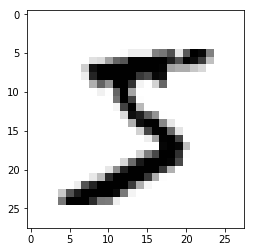

5


In [4]:
plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()
print(y_train[0])

### <font color = "blue" > So we can see this is the handwritten digit number 5 and its class is specified in the training set as '5'.

# STEP 3 : Preparing the data for the model.

### <font color = "blue" > Since we can see the image data is in the form of intensity of the color in range 0 to 255, we can normalize this data through 0 to 1, that will make our model perform better.

In [5]:
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

### <font color = "blue" > We can plot these numbers again just to check if it tampered with the image data or not. It shouldn't as the normalization just readjusts the range of intensity.

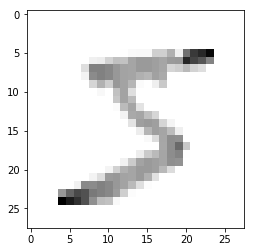

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [6]:
plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()
print(x_train[0])
print(y_train[0])

### <font color = "blue" > We can see the image is unchanged. For the most part, it's just the intensity variation which has changed which is inconsequential in the training of our model.

# STEP 4 : Building the model

In [7]:
model = tf.keras.models.Sequential()

### <font color = "blue" > Sequential models are of the type :
<img src = "1.png">
    
### <font color = "blue" > Sequential models are of the type :There will be 4 layers in our model, which makes it a deep neural network. They will be 1 flat input layer, 2 dense layers, 1 dense output layer.

In [8]:
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))
model.compile(optimizer = "adam",
              loss = "sparse_categorical_crossentropy",
              metrics = ['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


# STEP 5 : Fitting the model and training

### <font color = "blue" > We will now train the model with our previously obtained data set and run 2 epochs.

In [10]:
model.fit(x_train, y_train, epochs = 2)

Epoch 1/2
60000/60000 [==============================] - 6s 97us/sample - loss: 0.0717 - acc: 0.9775
Epoch 2/2
60000/60000 [==============================] - 6s 104us/sample - loss: 0.0530 - acc: 0.9831


# STEP 5 : Testing the model

In [13]:
loss, acc = model.evaluate(x_test, y_test)
print("LOSS : ",loss, "\nACCURACY : ",acc)

10000/10000 [==============================] - 0s 33us/sample - loss: 0.0891 - acc: 0.9724
LOSS :  0.08908459504281636 
ACCURACY :  0.9724


In [23]:
predictions = model.predict(x_test)
import numpy as np
predictions = [np.argmax(prediction) for prediction in predictions]

In [24]:
print(predictions)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 3, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 9, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 3, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 8, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 8, 7, 9, 3, 8, 4, 2, 0, 7, 1, 1, 2, 1, 

### <font color = "blue" > Let's test our model for any arbitrary test data number 70

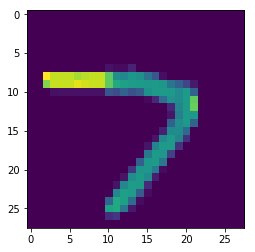

In [25]:
plt.imshow(x_test[70])
plt.show()

### <font color = "blue" > The predicted number for this handdrawn digit is : 

In [26]:
predictions[70]

7

# Some other examples : 

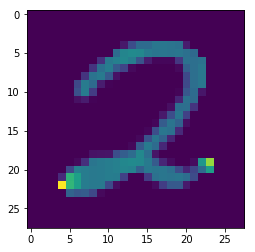

2

In [27]:
plt.imshow(x_test[35])
plt.show()
predictions[35]

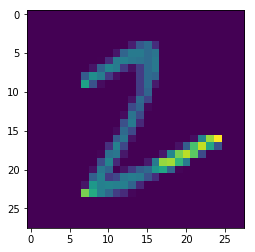

3

In [28]:
plt.imshow(x_test[38])
plt.show()
predictions[38]

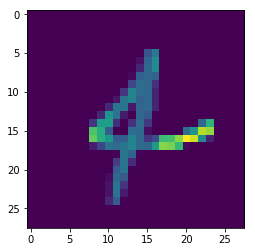

4

In [29]:
plt.imshow(x_test[300])
plt.show()
predictions[300]

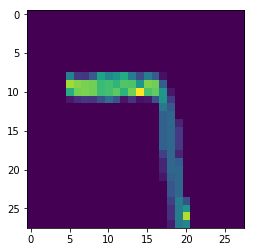

7

In [30]:
plt.imshow(x_test[5999])
plt.show()
predictions[5999]

# Inspired by : <a href= "https://www.youtube.com/channel/UCfzlCWGWYyIQ0aLC5w48gBQ">sentdex </a>
# You can refer his channel for further information on Deep networks and Data analytics.